# TCDF: Temporal Causal Discovery Framework

This notebook shows the functionality of TCDF. 

See the corresponding paper for more detail: __["Causal Discovery with Attention-Based Convolutional Neural Networks"](https://www.mdpi.com/2504-4990/1/1/19)__.

In [1]:
"""Shows all argument options"""

%run -i "runTCDF.py" --help

usage: runTCDF.py [-h] [--cuda] [--epochs EPOCHS] [--kernel_size KERNEL_SIZE]
                  [--hidden_layers HIDDEN_LAYERS]
                  [--learning_rate LEARNING_RATE] [--optimizer {Adam,RMSprop}]
                  [--log_interval LOG_INTERVAL] [--seed SEED]
                  [--dilation_coefficient DILATION_COEFFICIENT]
                  [--significance SIGNIFICANCE] [--plot]
                  (--ground_truth GROUND_TRUTH | --data DATA [DATA ...])

TCDF: Temporal Causal Discovery Framework

optional arguments:
  -h, --help            show this help message and exit
  --cuda                Use CUDA (GPU) (default: False)
  --epochs EPOCHS       Number of epochs (default: 1000)
  --kernel_size KERNEL_SIZE
                        Size of kernel, i.e. window size. Maximum delay to be
                        found is kernel size - 1. Recommended to be equal to
                        dilation coeffient (default: 4)
  --hidden_layers HIDDEN_LAYERS
                        Number of

To demonstrate the Temporal Causal Discovery Framework, we apply TCDF to a small dataset (`demo_dataset.csv`). This dataset contains 4 timeseries (called `Timeser0`,`Timeser1`,`Timeser2` and `Timeser3`), all containing 4,000 time steps. `Timeser0` and `Timeser3`contain random values. A value of `Timeser1` at timestep `t` is generated based on timestep `t-1` of `Timeser0` plus some noise. Therefore, `Timeser1` is caused by `Timeser0` with a delay of 1 time step. A value of `Timeser2` at timestep `t` is generated based on timestep `t-2` of `Timeser1` plus some noise. Therefore, `Timeser2` is caused by `Timeser1` with a delay of 2 time steps. File `demo_groundtruth` contains the ground truth, i.e. it tells that there is a causal relationship from `Timeser0` to `Timeser1` with a delay of 1 time step, and a causal relationship from `Timeser1` to `Timeser2` with a delay of 2 time steps.

In [2]:
"""Run TCDF"""
%matplotlib inline
%run -i "runTCDF.py" --data data/demo_dataset.csv

Arguments: Namespace(cuda=False, data=['data/demo_dataset.csv'], dilation_coefficient=4, epochs=1000, ground_truth=None, hidden_layers=0, kernel_size=4, learning_rate=0.01, log_interval=500, optimizer='Adam', plot=False, seed=1111, significance=0.8)

 Dataset:  demo_dataset.csv

 Analysis started for target:  Timeser0
Epoch:  1 [0%] 	Loss: 2.315027
Epoch: 500 [50%] 	Loss: 1.695510
Epoch: 1000 [100%] 	Loss: 1.694401
Potential causes:  [1]
Validated causes:  []

 Analysis started for target:  Timeser1
Epoch:  1 [0%] 	Loss: 4.291189
Epoch: 500 [50%] 	Loss: 0.002134
Epoch: 1000 [100%] 	Loss: 0.002114
Potential causes:  [0]
Validated causes:  [0]

 Analysis started for target:  Timeser2
Epoch:  1 [0%] 	Loss: 1.740447
Epoch: 500 [50%] 	Loss: 0.364763
Epoch: 1000 [100%] 	Loss: 0.364258
Potential causes:  [1, 0]
Validated causes:  [1]

 Analysis started for target:  Timeser3 
Epoch:  1 [0%] 	Loss: 2.264087
Epoch: 500 [50%] 	Loss: 1.657545
Epoch: 1000 [100%] 	Loss: 1.654903
Potential causes:  [

Arguments: Namespace(cuda=False, data=None, dilation_coefficient=4, epochs=500, ground_truth={'data/demo_dataset.csv': 'data/demo_groundtruth.csv'}, hidden_layers=0, kernel_size=4, learning_rate=0.01, log_interval=250, optimizer='Adam', plot=True, seed=1111, significance=0.8)

 Dataset:  demo_dataset.csv

 Analysis started for target:  Timeser0
Epoch:  1 [0%] 	Loss: 2.315027
Epoch: 250 [50%] 	Loss: 1.697026
Epoch: 500 [100%] 	Loss: 1.695510
Potential causes:  [1, 2]
Validated causes:  []

 Analysis started for target:  Timeser1
Epoch:  1 [0%] 	Loss: 4.291189
Epoch: 250 [50%] 	Loss: 0.002199
Epoch: 500 [100%] 	Loss: 0.002134
Potential causes:  [0]
Validated causes:  [0]

 Analysis started for target:  Timeser2
Epoch:  1 [0%] 	Loss: 1.740447
Epoch: 250 [50%] 	Loss: 0.365181
Epoch: 500 [100%] 	Loss: 0.364763
Potential causes:  [1, 0]
Validated causes:  [1]

 Analysis started for target:  Timeser3 
Epoch:  1 [0%] 	Loss: 2.264087
Epoch: 250 [50%] 	Loss: 1.658579
Epoch: 500 [100%] 	Loss: 1.6

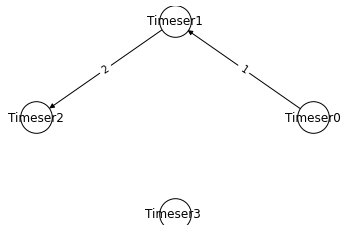

<Figure size 432x288 with 0 Axes>

In [3]:
"""Run TCDF and evaluate by comparing the results to the ground truth"""
%matplotlib inline
%run -i "runTCDF.py" --ground_truth data/demo_dataset.csv=data/demo_groundtruth.csv  --epochs 500 --log_interval 250 --plot

Arguments: Namespace(cuda=False, data=['data/demo_dataset.csv'], dilation_coefficient=4, epochs=1000, hidden_layers=0, kernel_size=4, learning_rate=0.01, log_interval=500, optimizer='Adam', plot=True, seed=1111, train_test_split=0.8)

 Analysis started for target:  Timeser0
Epoch:  1 [0%] 	Loss: 2.302341
Epoch: 500 [50%] 	Loss: 1.684893
Epoch: 1000 [100%] 	Loss: 1.684635

 Analysis started for target:  Timeser1
Epoch:  1 [0%] 	Loss: 4.267725
Epoch: 500 [50%] 	Loss: 0.002414
Epoch: 1000 [100%] 	Loss: 0.002391

 Analysis started for target:  Timeser2
Epoch:  1 [0%] 	Loss: 1.714814
Epoch: 500 [50%] 	Loss: 0.357675
Epoch: 1000 [100%] 	Loss: 0.357274

 Analysis started for target:  Timeser3 
Epoch:  1 [0%] 	Loss: 2.279164
Epoch: 500 [50%] 	Loss: 1.672744
Epoch: 1000 [100%] 	Loss: 1.671533

Mean Absolute Scaled Error (MASE) averaged over all time series in data/demo_dataset.csv : 0.4683169851132911 with standard deviation 0.3081077932321736


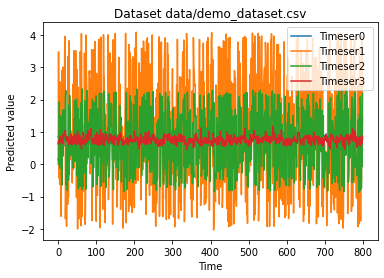

<Figure size 432x288 with 0 Axes>

In [4]:
"""Evaluates the prediction accuracy of TCDF."""
"""For more information about MASE (Mean Absolute Scaled Error), see https://otexts.org/fpp2/accuracy.html"""

%matplotlib inline
%run -i "evaluate_predictions_TCDF.py" --data data/demo_dataset.csv --plot